In [1]:
from classical_evolution import *


# Eckart Barrier

In [2]:
# Problem setup
T = .5
x0 = -3.0  # Initial position
p0 = 15.0  # Initial momentum
sigma = 0.5
L = 5    # Spatial domain [-L, L]

def eckart_initial_wave_function(x):
    val = np.exp(-(x - x0)**2 / (2 * sigma**2) + 1j*p0*(x - x0))
    normalize = lambda x: x / np.linalg.norm(x)
    return normalize(val)

eckart_potential = lambda x: 100/np.cosh(x/.5)


working on time evolution:   0%|          | 0/200 [00:00<?, ?it/s]

working on time evolution: 100%|██████████| 200/200 [00:00<00:00, 16437.29it/s]


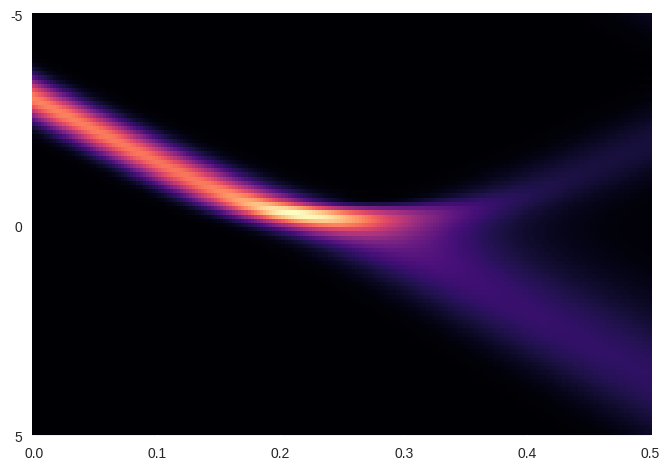

In [3]:
N = 100
K = 200
f = lambda input: 0
states, t_grid, x_grid = time_evolve_1(eckart_potential , eckart_initial_wave_function, N, L, K, T, f, D=1/2)
amplitudes = np.abs(states)**2
plot_time_evolution(amplitudes, t_grid, x_grid, interpolate_plot=False)


# Quadratic Potential

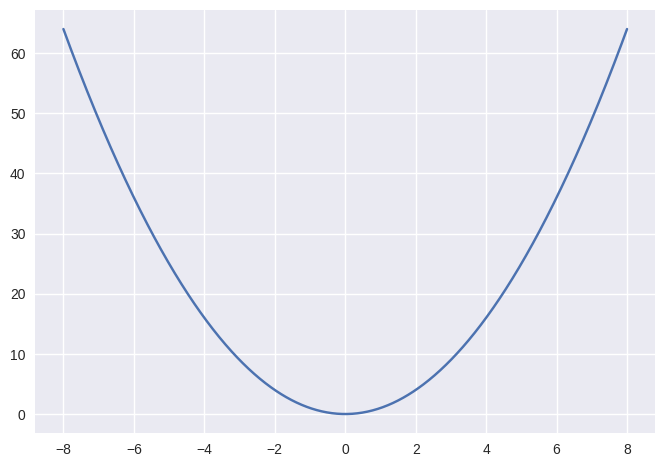

In [4]:
T = .5
L = 8    # Spatial domain [-L, L]
normalize = lambda x: x / np.linalg.norm(x)

# def initial_wave_function(x, x0 = -3, p0 = 15, sigma=.5):
#     val = np.exp(-(x - x0)**2 / (2 * sigma**2) + 1j*p0*(x - x0))
#     return normalize(val)
potential = lambda x: x**2
x_temp = np.linspace(-L, L, 1000)
plt.plot(x_temp, potential(x_temp))
plt.show()


working on time evolution: 100%|██████████| 200/200 [00:00<00:00, 16703.72it/s]


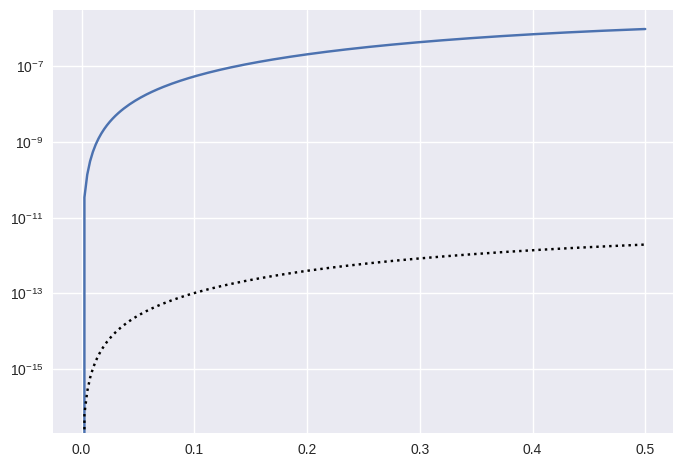

In [5]:
true_sol = lambda x, t: 1/np.sqrt(2)*np.pi**(-1/4)*(2*x**2 - 1)*np.exp(-x**2/2)*np.exp(-1j*5*t)
# fake_true_sol = time_evolve(potential, lambda x: true_sol(x, 0), 2**n_true, L, k_true, T, f, ord=2)[0]
n, k = 7, 200
T = .5
# dx, dt = 2*L/N, T/K
# x_grid = np.arange(-L, L - dx/2, dx)
states1, t_grid1, x_grid1 = time_evolve_1(potential, lambda x: true_sol(x, 0), 2**n, L, k, T, f, D=1)
states2, t_grid2, x_grid2 = time_evolve_2(potential, lambda x: true_sol(x, 0), 2**n, L, k, T, f, D=1)

# plt.plot(x_grid1, np.real(states2[-1, :]))
# plt.plot(x_grid1, np.real(true_sol(x_grid1, T)), ':k')
# plt.show()

error1 = []
error2 = []
for i in range(k + 1):
    error1.append(np.mean(np.abs(states1[i, :] - true_sol(x_grid1, t_grid1[i]))**2))
    error2.append(np.mean(np.abs(states2[i, :] - true_sol(x_grid1, t_grid1[i]))**2))
    # error1.append(np.mean(np.abs(states1[i, :] - fake_true_sol[int(k_true/k*i), :][::2**(n_true - n)])**2))
    # error2.append(np.mean(np.abs(states2[i, :] - fake_true_sol[int(k_true/k*i), :][::2**(n_true - n)])**2))
plt.semilogy(t_grid1, error1)
plt.semilogy(t_grid2, error2, ':k')
plt.show()


working on time evolution: 100%|██████████| 500/500 [00:00<00:00, 21059.76it/s]


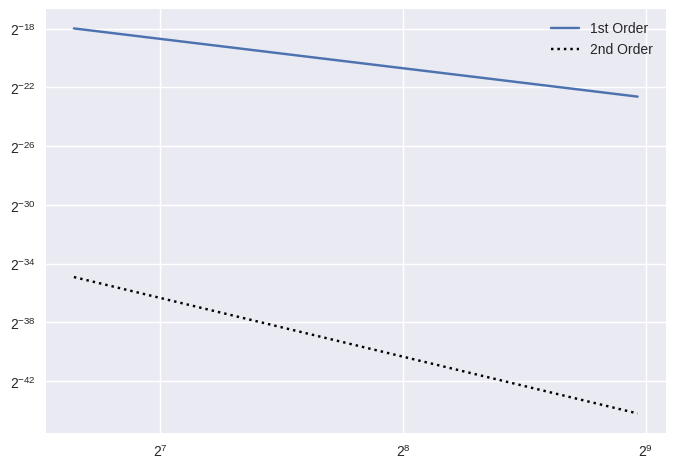

In [6]:
n = 100
k_vals = [100, 200, 300, 400, 500]
error1, error2 = [], []
i = 0


for k in k_vals:
    states1, t_grid1, x_grid1 = time_evolve_1(potential, lambda x: true_sol(x, 0), n, L, k, T, f, D=1)
    states2, t_grid2, x_grid2 = time_evolve_2(potential, lambda x: true_sol(x, 0), n, L, k, T, f, D=1)
    error1.append(np.mean(np.abs(states1[-1, :] - true_sol(x_grid1, t_grid1[-1]))**2))
    error2.append(np.mean(np.abs(states2[-1, :] - true_sol(x_grid1, t_grid1[-1]))**2))
    i += 1

plt.loglog(k_vals, error1, base=2)
plt.loglog(k_vals, error2, base=2, linestyle=':', color='k')
plt.legend(['1st Order', '2nd Order'])
# plt.axis('equal')
plt.show()


working on time evolution: 100%|██████████| 128/128 [00:00<00:00, 21385.02it/s]


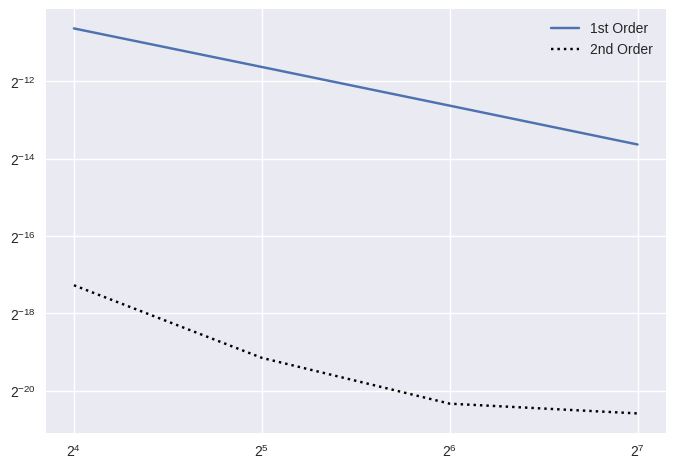

In [7]:
n_true, k_true = 14, 14
fake_true_sol = time_evolve_1(potential, lambda x: true_sol(x, 0), 2**n_true, L, 2**k_true, T, f)[0]

n = 7
N = 2**n
k_vals = [2**i for i in range(4, 8)]
error1, error2 = [], []
i = 0
for k in k_vals:
    states1, t_grid1, x_grid1 = time_evolve_1(potential, lambda x: true_sol(x, 0), N, L, k, T, f)
    states2, t_grid2, x_grid2 = time_evolve_2(potential, lambda x: true_sol(x, 0), N, L, k, T, f)
    error1.append(np.sqrt(np.sum(np.abs(states1[-1, :] - fake_true_sol[-1, :][::2**(n_true - n)])**2))/len(x_grid1))
    error2.append(np.sqrt(np.sum(np.abs(states2[-1, :] - fake_true_sol[-1, :][::2**(n_true - n)])**2))/len(x_grid2))
    i += 1

plt.loglog(k_vals, error1, base=2)
plt.loglog(k_vals, error2, base=2, linestyle=':', color='k')
plt.legend(['1st Order', '2nd Order'])
# plt.axis('equal')
plt.show()


# Soliton

working on time evolution: 100%|██████████| 200/200 [00:00<00:00, 24291.57it/s]


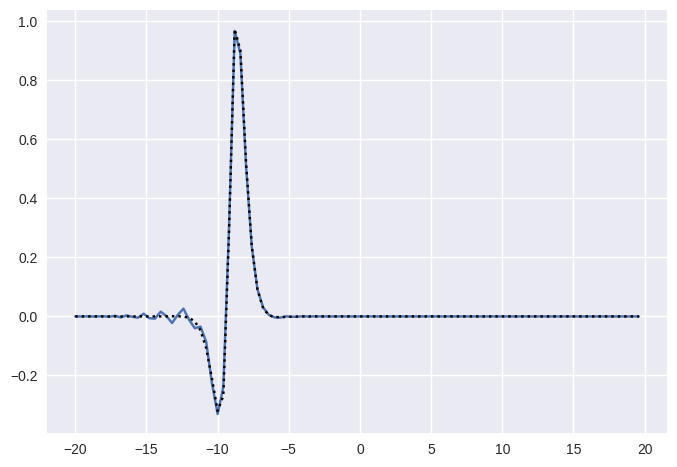

In [8]:
A = 2
beta = -1
v = 1
x0 = -10
L = 20
theta0 = 0
true_sol = lambda x, t: A/np.sqrt(-beta)/np.cosh(A*(x-v*t-x0))*np.exp(1j*(v*x-1/2*(v**2-A**2)*t+theta0))

soliton_potential = lambda x: 0
soliton_initial_wave = lambda x: true_sol(x, 0)
f = lambda input: beta*input
T = 1
states, t_grid, x_grid = time_evolve_2(soliton_potential, soliton_initial_wave, 100, L, 200, T, f)
dx = x_grid[1] - x_grid[0]

plt.plot(x_grid, np.real(states[-1, :]))
plt.plot(x_grid, np.real(true_sol(x_grid , T)), ':k')
plt.show()


working on time evolution: 100%|██████████| 3200/3200 [00:00<00:00, 18396.17it/s]


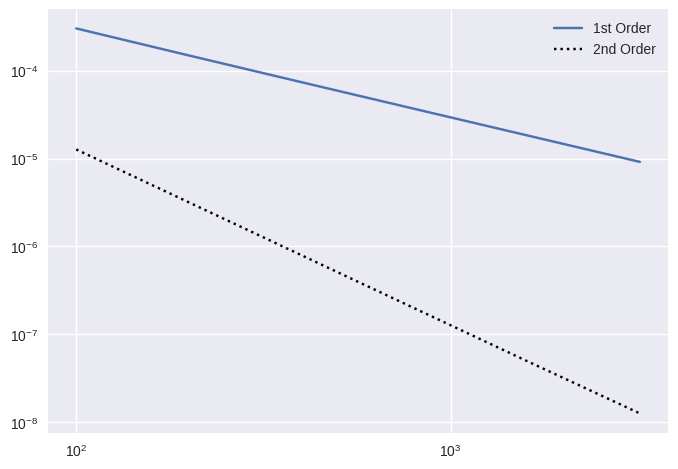

In [9]:
N = 256
K_vals = [100, 200, 400, 800, 1600, 3200]
L = 20
error1, error2 = [], []
for K in K_vals:
    states1, t_grid1, x_grid1 = time_evolve_1(soliton_potential, soliton_initial_wave, N, L, K, T, f)
    states2, t_grid2, x_grid2 = time_evolve_2(soliton_potential, soliton_initial_wave, N, L, K, T, f)
    error1.append(np.sqrt(np.sum(np.abs(states1[-1, :] - true_sol(x_grid1, T))**2))/len(x_grid1))
    error2.append(np.sqrt(np.sum(np.abs(states2[-1, :] - true_sol(x_grid2, T))**2))/len(x_grid2))
plt.loglog(K_vals, error1, base=10)
plt.loglog(K_vals, error2, base=10, linestyle=':', color='k')
plt.legend(['1st Order', '2nd Order'])
plt.show()


# Periodic Gaussian

In [10]:
k0=.5
sigma = .5
mu = 0
L = 10
def gaussian(x, t):
    parT = 1/(sigma*np.sqrt(2*np.pi)*np.sqrt(1+2.0*1j*t/np.square(sigma)))
    part2 = np.exp(-np.square(k0)/4)*np.exp(-np.square((x-mu)/(np.sqrt(2)*sigma)-1j*k0/2)/(1+2*1j*t/np.square(sigma)))
    part3 = np.sqrt(sigma)*np.sqrt(2)*np.sqrt(np.sqrt(np.pi))
    part4 = parT * part2 * part3
    return part4

def solution_gaussian(x, t):
    part0 = gaussian(x, t)
    parT = gaussian(x + L, t) + gaussian(x - L, t)
    part2 = gaussian(x + 2*L, t) + gaussian(x - 2*L, t)
    part3 = gaussian(x + 3*L, t) + gaussian(x - 3*L, t)
    part4 = gaussian(x + 4*L, t) + gaussian(x - 4*L, t)
    part5 = gaussian(x + 5*L, t) + gaussian(x - 5*L, t)
    part6 = gaussian(x + 6*L, t) + gaussian(x - 6*L, t)
    part7 = gaussian(x + 7*L, t) + gaussian(x - 7*L, t)
    part8 = gaussian(x + 8*L, t) + gaussian(x - 8*L, t)
    part9 = part0 + parT + part2 + part3 + part4 + part5 + part6 + part7 + part8
    return part9 / np.linalg.norm(part9)


working on time evolution: 100%|██████████| 200/200 [00:00<00:00, 32242.80it/s]

8.047420240722032e-31


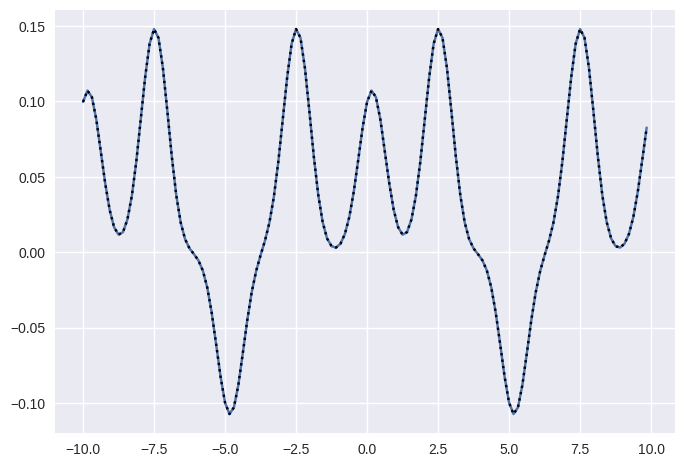

In [11]:
gaussian_potential = lambda x: 0
gaussian_initial_wave = lambda x: solution_gaussian(x, 0)
f = lambda input: 0
T = 2
states, t_grid, x_grid  = time_evolve_2(gaussian_potential, gaussian_initial_wave, 2**7, L, 200, T, f, D=1)
dx = x_grid[1] - x_grid[0]

i = -1
plt.plot(x_grid , np.real(states[i, :]))
plt.plot(x_grid , np.real(solution_gaussian(x_grid , t_grid[i])), ':k')
print(np.mean(np.abs(states[i, :] - solution_gaussian(x_grid , t_grid[i]))**2))
plt.show()


working on time evolution: 100%|██████████| 200/200 [00:00<00:00, 25333.28it/s]


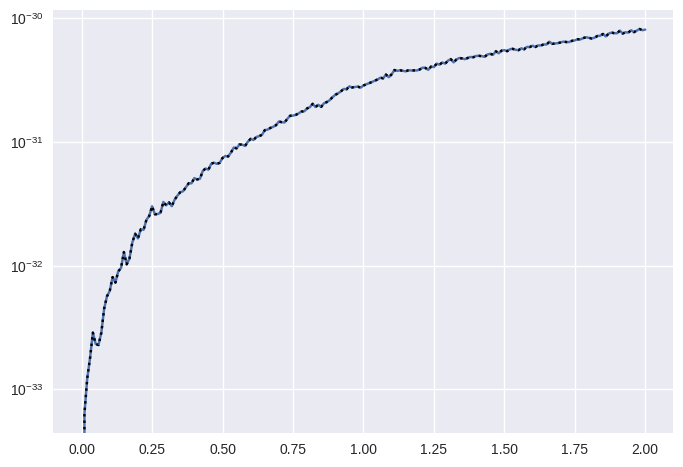

In [12]:
# true_sol = lambda x, t: 1/np.sqrt(2)*np.pi**(-1/4)*(2*x**2 - 1)*np.exp(-x**2/2)*np.exp(-1j*5*t)
# fake_true_sol = time_evolve(potential, lambda x: true_sol(x, 0), 2**n_true, L, k_true, T, f, ord=2)[0]
n, k = 7, 200
# dx, dt = 2*L/N, T/K
# x_grid = np.arange(-L, L - dx/2, dx)
states1, t_grid1, x_grid1 = time_evolve_1(gaussian_potential, gaussian_initial_wave, 2**n, L, k, T, f, D=1)
states2, t_grid2, x_grid2 = time_evolve_2(gaussian_potential, gaussian_initial_wave, 2**n, L, k, T, f, D=1)

error1 = []
error2 = []
for i in range(k + 1):
    error1.append(np.mean(np.abs(states1[i, :] - solution_gaussian(x_grid1, t_grid1[i]))**2))
    error2.append(np.mean(np.abs(states2[i, :] - solution_gaussian(x_grid1, t_grid1[i]))**2))
    # error1.append(np.mean(np.abs(states1[i, :] - fake_true_sol[int(k_true/k*i), :][::2**(n_true - n)])**2))
    # error2.append(np.mean(np.abs(states2[i, :] - fake_true_sol[int(k_true/k*i), :][::2**(n_true - n)])**2))
plt.semilogy(t_grid1, error1)
plt.semilogy(t_grid2, error2, ':k')
plt.show()
# i = 199
# plt.plot(states2[i, :])
# plt.plot(fake_true_sol[int(k_true/k*i), :][::2**(n_true - n)])
# # plt.plot(x_grid1, np.abs(states1[0, :])**2)
# plt.plot(x_grid1, np.abs(true_sol(x_grid1, 0))**2)


working on time evolution: 100%|██████████| 600/600 [00:00<00:00, 32207.72it/s]


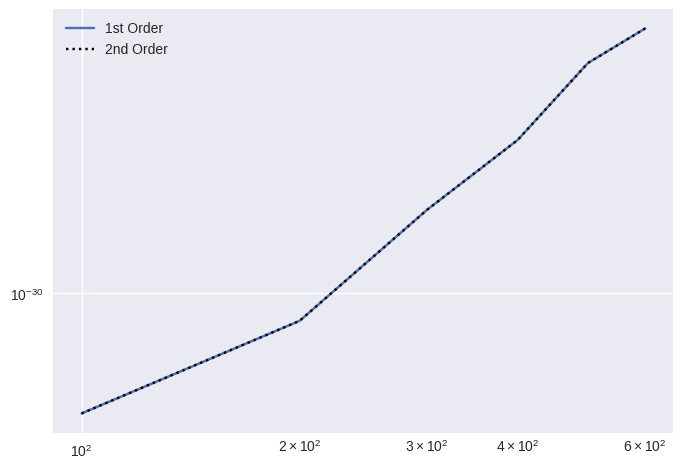

In [13]:
K_vals = [100, 200, 300, 400, 500, 600]
L = 10
error1, error2 = [], []
for K in K_vals:
    states1, t_grid1, x_grid1 = time_evolve_1(gaussian_potential, gaussian_initial_wave, 2**n, L, K, T, f, D=1)
    states2, t_grid2, x_grid2 = time_evolve_2(gaussian_potential, gaussian_initial_wave, 2**n, L, K, T, f, D=1)
    error1.append(np.mean(np.abs(states1[-1, :] - solution_gaussian(x_grid1, t_grid1[-1]))**2))
    error2.append(np.mean(np.abs(states2[-1, :] - solution_gaussian(x_grid1, t_grid1[-1]))**2))
plt.loglog(K_vals, error1, base=10)
plt.loglog(K_vals, error2, base=10, linestyle=':', color='k')
plt.legend(['1st Order', '2nd Order'])
# plt.axis('equal')
plt.show()
